This is the first week's assignment which requires me to complete K-means and PCA manually by myself.

In [2]:
# -*- coding: utf-8 -*-
# @Time    : 2018/1/7 12:07
# @Author  : Jiahao Yang
# @Email   : yangjh39@uw.edu

# ------------------------------------------------------------------------- #
#                               STAT 538 HW 1                               #
# ------------------------------------------------------------------------- #

# Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

Code for K-means algorithm.

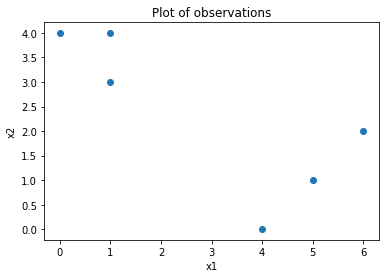

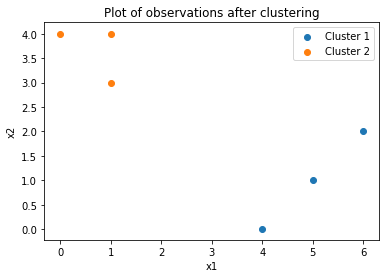

In [3]:
# ------------------------------- K-means clustering with group 2 -------------------------------- #
# Data
data = pd.DataFrame({'x1': [1, 1, 0, 5, 6, 4], 'x2': [4, 3, 4, 1, 2, 0]})

# a) Plot the observation
plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of observations')

plt.show()

# b) Assign cluster labels randomly
lab = []

np.random.seed(9001)
for i in range(0, 6, 1):
    lab.append(np.random.randint(1, 3))

data['label'] = lab

# c) Compute the centroid
def compute_centroid(dat):
    centroid1 = dat.where(dat.loc[:, 'label'] == 1).mean(numeric_only=True)
    centroid2 = dat.where(dat.loc[:, 'label'] == 2).mean(numeric_only=True)

    return pd.DataFrame({'c1': centroid1, 'c2': centroid2})

centroid = compute_centroid(data)

# d) Reassign observations
def reassign(dat,cent):
    # Calculate the distance between each observation and each centroid
    dat['dis1'] = ((dat['x1'] - cent.loc['x1', 'c1']).pow(2) + (dat['x2'] - cent.loc['x2', 'c1']).pow(2)).pow(.5)
    dat['dis2'] = ((dat['x1'] - cent.loc['x1', 'c2']).pow(2) + (dat['x2'] - cent.loc['x2', 'c2']).pow(2)).pow(.5)

    # Update the labels
    dat['label'].update(dat['label'].where(dat['dis1'] >= dat['dis2'], 1))
    dat['label'].update(dat['label'].where(dat['dis1'] < dat['dis2'], 2))

# reassign(data, centroid)

# e) Repeat step c) and d) until the answer stop change
original_label = data['label'].copy(deep=True)+1  # Initial labels
k = 1  # Counter

# repeat step C) and d) until the labels stop change
while not (original_label == data['label']).all():
    original_label = data['label'].copy(deep=True)
    centroid = compute_centroid(data)
    reassign(data, centroid)
    k += 1

# f) Plot observations with color
dot1 = plt.scatter(data.loc[np.where(data['label'] == 1)[0].tolist(), 'x1'], data.loc[np.where(data['label'] == 1)[0].tolist(), 'x2'])
dot2 = plt.scatter(data.loc[np.where(data['label'] == 2)[0].tolist(), 'x1'], data.loc[np.where(data['label'] == 2)[0].tolist(), 'x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend([dot1, dot2], ["Cluster 1", "Cluster 2"])
plt.title('Plot of observations after clustering')

plt.show()


Code for the comparison between PCA and K-means algorithem

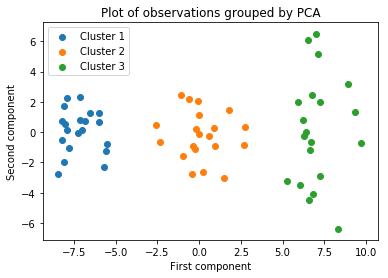

In [4]:
# ------------------------------- Comparison between PCA and K-means algorithem -------------------------------- #
# a) Generate a simulated data set
np.random.seed(9001)

data = pd.DataFrame(np.random.normal(0, 1, size=(20, 50)))
data = data.append(pd.DataFrame(np.random.normal(1, 1.25, size=(20, 50))))
data = data.append(pd.DataFrame(np.random.normal(2, 1.5, size=(20, 50))))
data.index = np.arange(60)
data['label'] = np.repeat(1, 20).tolist() + np.repeat(2, 20).tolist() + np.repeat(3, 20).tolist()

# b) Perform PCA
# Center data to have mean 0
data_centered = pd.DataFrame(scale(data.loc[:, np.arange(50)], with_mean=True, with_std=False))

# Calculate the first 2 principal components
pca = PCA(n_components=2)
first2component = pd.DataFrame(pca.fit_transform(data_centered), columns=['c1', 'c2'])
first2component['label'] = data['label']

# Scatter plot
dot1 = plt.scatter(first2component.loc[np.where(first2component['label'] == 1)[0].tolist(), 'c1'], first2component.loc[np.where(first2component['label'] == 1)[0].tolist(), 'c2'])
dot2 = plt.scatter(first2component.loc[np.where(first2component['label'] == 2)[0].tolist(), 'c1'], first2component.loc[np.where(first2component['label'] == 2)[0].tolist(), 'c2'])
dot3 = plt.scatter(first2component.loc[np.where(first2component['label'] == 3)[0].tolist(), 'c1'], first2component.loc[np.where(first2component['label'] == 3)[0].tolist(), 'c2'])

plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend([dot1, dot2, dot3], ["Cluster 1", "Cluster 2", "Cluster 3"])
plt.title('Plot of observations grouped by PCA')

plt.show()

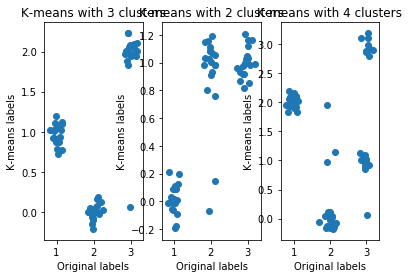

In [5]:
# c) Perform K-means with 3 clusters
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(data.loc[:, np.arange(50)])

data['kmeans_label'] = kmeans3.labels_

plt.subplot(131)
plt.scatter(data['label']+np.random.normal(0, 0.1, 60), data['kmeans_label']+np.random.normal(0, 0.1, 60))
plt.xlabel('Original labels')
plt.ylabel('K-means labels')
plt.title('K-means with 3 clusters')

# d) Perform K-means with 2 clusters
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data.loc[:, np.arange(50)])

data['kmeans_label'] = kmeans2.labels_

plt.subplot(132)
plt.scatter(data['label']+np.random.normal(0, 0.1, 60), data['kmeans_label']+np.random.normal(0, 0.1, 60))
plt.xlabel('Original labels')
plt.ylabel('K-means labels')
plt.title('K-means with 2 clusters')

# e) Perform K-means with 4 clusters
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(data.loc[:, np.arange(50)])

data['kmeans_label'] = kmeans4.labels_

plt.subplot(133)
plt.scatter(data['label']+np.random.normal(0, 0.1, 60), data['kmeans_label']+np.random.normal(0, 0.1, 60))
plt.xlabel('Original labels')
plt.ylabel('K-means labels')
plt.title('K-means with 4 clusters')

plt.show()

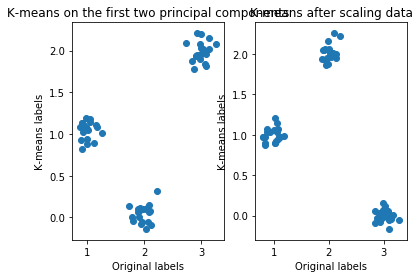

In [6]:
# f) Perform K-means on the first two principal components
kmeans_cp = KMeans(n_clusters=3)
kmeans_cp.fit(first2component.iloc[:, [0, 1]])

first2component['kmeans_label'] = kmeans_cp.labels_

plt.subplot(121)
plt.scatter(first2component['label']+np.random.normal(0, 0.1, 60), first2component['kmeans_label']+np.random.normal(0, 0.1, 60))
plt.xlabel('Original labels')
plt.ylabel('K-means labels')
plt.title('K-means on the first two principal components')

# g) Perform K-means after scaling data
data_scaled = pd.DataFrame(scale(data.loc[:, np.arange(50)], with_std=True, with_mean=True))
data_scaled['label'] = data['label']

kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(data_scaled)

data_scaled['kmeans_label'] = kmeans_scaled.labels_

plt.subplot(122)
plt.scatter(data_scaled['label']+np.random.normal(0, 0.1, 60), data_scaled['kmeans_label']+np.random.normal(0, 0.1, 60))
plt.xlabel('Original labels')
plt.ylabel('K-means labels')
plt.title('K-means after scaling data')

plt.show()

Code for SOM algorithm

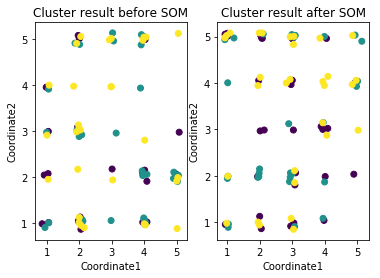

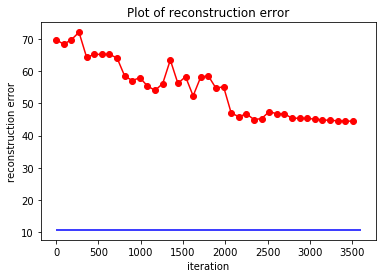

In [10]:
# ------------------------------- SOM algorithm -------------------------------- #
# Generate simulated data
# Make sure that after running program each time, the result will be the same
np.random.seed(1)

def belong(dat, pro):

    # Define a function to specify which centroid each observation belongs to
    # Input is a dataframe of observations and a dataframe of the prototypes' information
    # Returns are the centroids each observation belongs to.

    dat[['coordinates1', 'coordinates2']] = pro[['coordinates1', 'coordinates2']]

    for i in np.arange(len(dat.index)):
        # The prototype's index that is closet to x_j
        pro_index = (dat.iloc[i, [1, 2, 3]] - pro).pow(2).T.sum().idxmin(axis=0, skipna=True)
        dat.loc[i, ['coordinates1', 'coordinates2']] = pro.loc[pro_index, ['coordinates1', 'coordinates2']]


# Initial data set
data = pd.DataFrame(columns=['x', 'y', 'z'])

for i in range(0, 30):
    # First class
    theta1 = np.random.uniform(-math.pi / 8, math.pi / 8)
    phi1 = np.random.uniform(0, 2 * math.pi)
    x1 = math.sin(theta1) * math.cos(phi1) + np.random.normal(0, 0.6)
    y1 = math.sin(theta1) * math.sin(phi1) + np.random.normal(0, 0.6)
    z1 = math.cos(theta1) + np.random.normal(0, 0.6)

    # Second class
    theta2 = np.random.uniform(math.pi / 2 - math.pi / 4, math.pi / 2 + math.pi / 4)
    phi2 = np.random.uniform(-math.pi / 4, math.pi / 4)
    x2 = math.sin(theta2) * math.cos(phi2) + np.random.normal(0, 0.6)
    y2 = math.sin(theta2) * math.sin(phi2) + np.random.normal(0, 0.6)
    z2 = math.cos(theta2) + np.random.normal(0, 0.6)

    # Third class
    theta3 = np.random.uniform(math.pi / 2 - math.pi / 4, math.pi / 2 + math.pi / 4)
    phi3 = np.random.uniform(math.pi / 2 - math.pi / 4, math.pi / 2 + math.pi / 4)
    x3 = math.sin(theta3) * math.cos(phi3) + np.random.normal(0, 0.6)
    y3 = math.sin(theta3) * math.sin(phi3) + np.random.normal(0, 0.6)
    z3 = math.cos(theta3) + np.random.normal(0, 0.6)

    # In each loop, update the data set to obtain the whole data set
    data = data.append(pd.DataFrame([[x1, y1, z1], [x2, y2, z2], [x3, y3, z3]], columns=['x', 'y', 'z']))

data['label'] = np.repeat(1, 30).tolist() + np.repeat(2, 30).tolist() + np.repeat(3, 30).tolist()
data.index = np.arange(90)   # reindex

# K-means model and its construction error
model = KMeans(n_clusters=25)
model.fit(data.iloc[:, [0, 1, 2]])

k_error = model.inertia_
data['K-means label'] = model.labels_

# Show the K-means clustering's result
# plt.scatter(data['K-means label'], np.repeat(1, 90)+ np.random.normal(0, 0.07, 90), c=data['label'])
# plt.ylim(0, 2)
# plt.show()

# Perform SOM
# Initial parameters
n = 40   # The number of passes
r = 2   # distance threshold
alpha = 1   # learning rate

r_step = (r-1)/(90*n)   # decreasing rate in every iteration
alpha_step = alpha/(90*n)

# Initial prototypes randomly
np.random.seed(1)
m = pd.DataFrame(np.random.normal(0, 1, size=(25, 3)), columns=['x', 'y', 'z'])
m[['coordinates1', 'coordinates2']] = pd.DataFrame([np.repeat([1,2,3,4,5],5),[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]]).T
m['z'] = 0
reconstruction_error = []

# Plot the cluster result before SOM
belong(data, m)

plt.subplot(121)
plt.scatter(data['coordinates1'] + np.random.normal(0, 0.07, 90), data['coordinates2'] + np.random.normal(0, 0.07, 90), c=data['label'])
plt.xlabel('Coordinate1')
plt.ylabel('Coordinate2')
plt.title('Cluster result before SOM')

# Begin SOM
for i in np.arange(n):
    for j in np.arange(90):
        # Update parameters
        alpha -= alpha_step
        r -= r_step

        # The prototype's index that is closet to x_j
        m_index = (data.iloc[j, [0, 1, 2]] - m).pow(2).T.sum().idxmin(axis=0, skipna=True)

        # Find neighbors of the selected prototype
        m['dist'] = ((m['coordinates1'] - m.loc[m_index, 'coordinates1']).pow(2) + (m['coordinates2'] - m.loc[m_index, 'coordinates2']).pow(2)).pow(0.5)
        # Update prototypes
        m.update(m.loc[m['dist'] <= r, ['x', 'y', 'z']] + alpha * (data.iloc[j, :] - m.loc[m['dist'] <= r, ['x', 'y', 'z']]))

    # Calculate reconstruction error
    reconstruction_error_ele = []
    for k in np.arange(90):
        m_index = (data.iloc[k,  [0, 1, 2]] - m).pow(2).T.sum().idxmin(axis=0, skipna=True)
        reconstruction_error_ele.append(pow((data.iloc[k,  [0, 1, 2]] - m.loc[m_index, ['x', 'y', 'z']]).pow(2).sum(), 0.5))

    print(str(n-i)+' pass(es) left.')
    reconstruction_error.append(sum(reconstruction_error_ele))

# Plot the cluster result after SOM
belong(data, m)

plt.subplot(122)
plt.scatter(data['coordinates1'] + np.random.normal(0, 0.07, 90), data['coordinates2'] + np.random.normal(0, 0.07, 90), c=data['label'])
plt.xlabel('Coordinate1')
plt.ylabel('Coordinate2')
plt.title('Cluster result after SOM')
plt.show()

# Plot scatter plot of reconstruction error
plt.figure(2)
plt.plot(np.arange(0, n*90, 90), reconstruction_error, 'ro-')
plt.hlines(k_error, 0, n*90, 'b')
plt.xlabel('iteration')
plt.ylabel('reconstruction error')
plt.title('Plot of reconstruction error')

plt.show()

# reconstruction_error[-1]/k_error